## Summary of Top 3 Countries by Average ARPI_D14 (Fruit Battle)
- US: Avg ARPI_D14 = 0.4100, Total Installs = 18023, Total Ad Spend = $8540.47, Avg ROAS_D14 = 0.92
- GB: Avg ARPI_D14 = 0.1901, Total Installs = 3112, Total Ad Spend = $804.80, Avg ROAS_D14 = 0.76
- DE: Avg ARPI_D14 = 0.1460, Total Installs = 6088, Total Ad Spend = $1420.31, Avg ROAS_D14 = 0.66


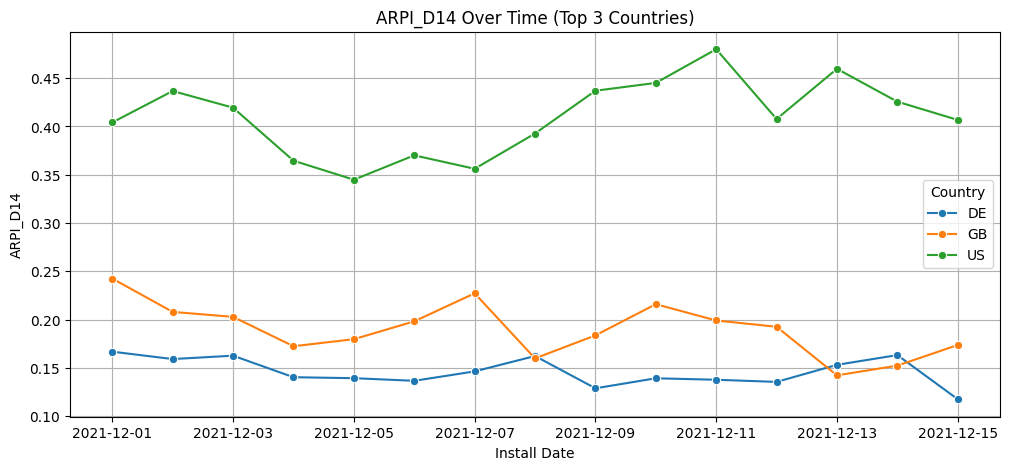

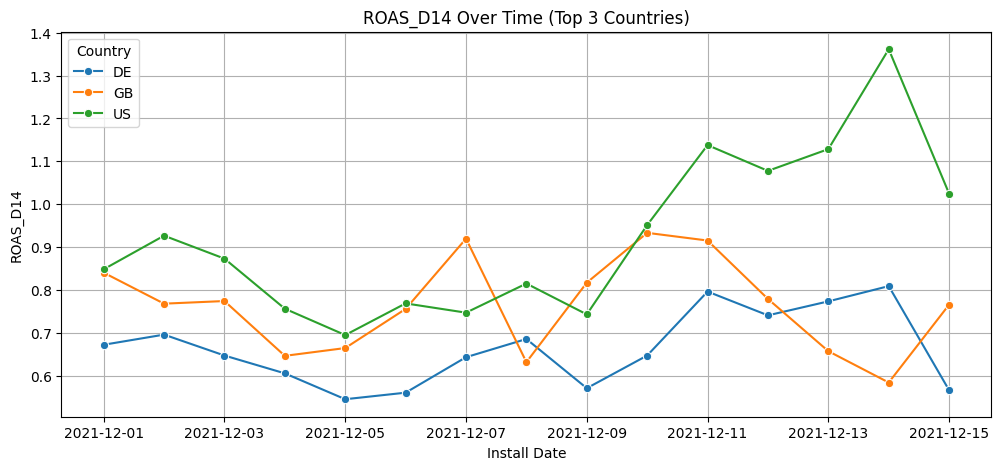

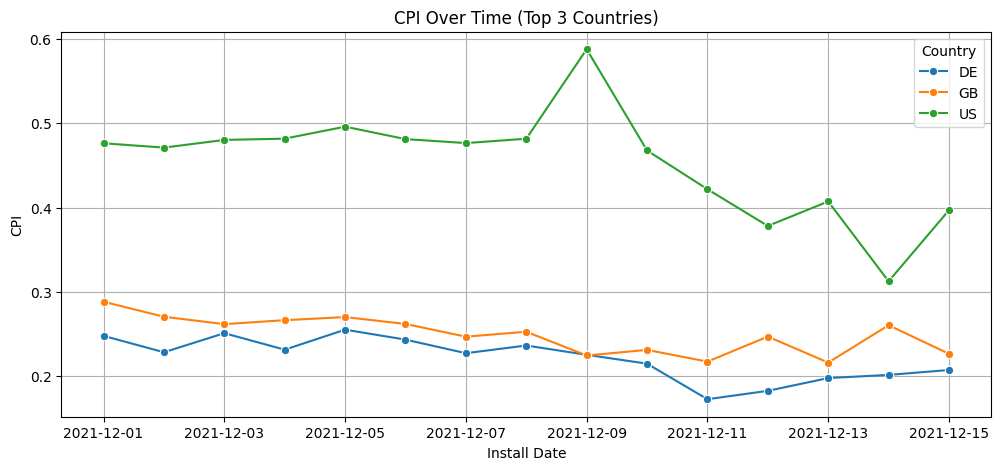

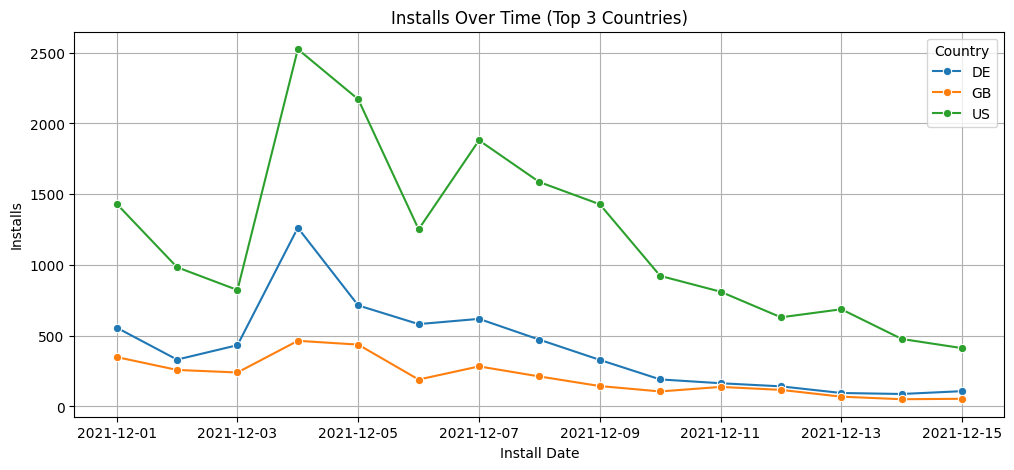

## Recommendations for Next Steps
- US:
  - Moderate/Low ROAS_D14: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.

- GB:
  - Moderate/Low ROAS_D14: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.

- DE:
  - Moderate/Low ROAS_D14: Optimize campaigns for better targeting or reduce CPI.
  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.
  - Analyze user cohorts for retention and upsell opportunities.



In [3]:
# Fruit Battle: Top 3 Countries by ARPI_D14 Analysis (01-12-2021 to 15-12-2021)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('summary.csv', parse_dates=['install_date'])

# Filter for Fruit Battle and date range
mask = (
    (df['client'] == 'fruit_battle') &
    (df['install_date'] >= '2021-12-01') &
    (df['install_date'] <= '2021-12-15')
)
fb = df[mask]

# Group by country and calculate average ARPI_D14
country_arpi = df.groupby('country')['arpi_d14'].mean().sort_values(ascending=False)
top3_countries = country_arpi.head(3).index.tolist()

# Filter for top 3 countries
fb_top3 = fb[fb['country'].isin(top3_countries)]

# Summary bullet points
print("## Summary of Top 3 Countries by Average ARPI_D14 (Fruit Battle)")
for country in top3_countries:
    avg_arpi = country_arpi[country]
    installs = fb[fb['country'] == country]['installs'].sum()
    spend = fb[fb['country'] == country]['ad_spend'].sum()
    roas = fb[fb['country'] == country]['roas_d14'].mean()
    print(f"- {country}: Avg ARPI_D14 = {avg_arpi:.4f}, Total Installs = {installs}, Total Ad Spend = ${spend:.2f}, Avg ROAS_D14 = {roas:.2f}")

# Visualizations

# --- Plot ARPI_D14 trends ---
plt.figure(figsize=(12, 5))
sns.lineplot(data=fb_top3, x='install_date', y='arpi_d14', hue='country', marker='o')
plt.title('ARPI_D14 Over Time (Top 3 Countries)')
plt.ylabel('ARPI_D14')
plt.xlabel('Install Date')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# --- Plot ROAS_D14 trends ---
plt.figure(figsize=(12, 5))
sns.lineplot(data=fb_top3, x='install_date', y='roas_d14', hue='country', marker='o')
plt.title('ROAS_D14 Over Time (Top 3 Countries)')
plt.ylabel('ROAS_D14')
plt.xlabel('Install Date')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# --- Plot CPI trends ---
plt.figure(figsize=(12, 5))
sns.lineplot(data=fb_top3, x='install_date', y='cpi', hue='country', marker='o')
plt.title('CPI Over Time (Top 3 Countries)')
plt.ylabel('CPI')
plt.xlabel('Install Date')
plt.legend(title='Country')
plt.grid(True)
plt.show()


# --- Installs trend ---
plt.figure(figsize=(12, 5))
sns.lineplot(data=fb_top3, x='install_date', y='installs', hue='country', marker='o')
plt.title('Installs Over Time (Top 3 Countries)')
plt.ylabel('Installs')
plt.xlabel('Install Date')
plt.legend(title='Country')
plt.grid(True)
plt.show()


# Recommendations
print("## Recommendations for Next Steps")
for country in top3_countries:
    avg_arpi = country_arpi[country]
    avg_cpi = fb[fb['country'] == country]['cpi'].mean()
    avg_roas = fb[fb['country'] == country]['roas_d14'].mean()
    print(f"- {country}:")
    if avg_roas > 1:
        print("  - Strong ROAS_D14 (>1): Consider increasing ad spend to scale user acquisition.")
    else:
        print("  - Moderate/Low ROAS_D14: Optimize campaigns for better targeting or reduce CPI.")
    print("  - Monitor ARPI_D14 trends and test new creatives or channels to improve monetization.")
    print("  - Analyze user cohorts for retention and upsell opportunities.\n")